In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
from sklearn.metrics import r2_score

# Loading data

In [3]:
# This dataset has 216 features
df = pd.read_csv('vt_overpass_features_normal_target_CORRECTED.csv', index_col=0)
# This dataset has 16 features
#df = pd.read_csv("vt_overpass_minimized_features_normal_target.csv", index_col=0)

In [4]:
df.head()

,area_aeroway.aerodrome,area_aeroway.apron,area_aeroway.helipad,area_aeroway.holding_position,area_aeroway.navigationaid,area_aeroway.runway,area_aeroway.taxiway,area_aeroway.terminal,area_amenity.arts_centre,area_amenity.atm,...,road_surface.earth,road_surface.grass,road_surface.gravel,road_surface.ground,road_surface.paved,road_surface.sand,road_surface.unpaved,road_surface.wood,normal_aadt,ytrans
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017230,0.384754
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019030,0.399808
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085000,0.626545
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035417,0.493914
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021983,0.421662


In [5]:
test = pd.read_csv('dummy_features.csv', index_col=0)

In [6]:
for i in df.columns:
    if i not in test.columns:
        print(i)

area_aeroway.aerodrome
normal_aadt
ytrans


In [7]:
another_row = pd.read_csv('overpass_data/{}.csv'.format(str(0).rjust(4,'0')), index_col=0)

In [8]:
another_row

,area_aeroway,area_barrier,area_building,area_healthcare,area_landuse,area_leisure,area_man_made,area_natural,area_parking,area_power,...,road_surface.asphalt,area_amenity.post_office,area_boundary.administrative,area_highway.residential,area_highway.service,area_highway.unclassified,area_highway.cycleway,area_surface.asphalt,area_surface.unpaved,area_surface.gravel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,28,8,4,2,14,2,2


In [9]:
feature_df = pd.concat([test, another_row], sort=True)
feature_df.reset_index(inplace=True)

In [10]:
feature_df

,index,area_aeroway,area_aeroway.apron,area_aeroway.helipad,area_aeroway.holding_position,area_aeroway.navigationaid,area_aeroway.runway,area_aeroway.taxiway,area_aeroway.terminal,area_amenity.arts_centre,...,road_surface.concrete:plates,road_surface.dirt,road_surface.earth,road_surface.grass,road_surface.gravel,road_surface.ground,road_surface.paved,road_surface.sand,road_surface.unpaved,road_surface.wood
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_zeros = df.copy().fillna(0)

In [12]:
df.columns

Index(['area_aeroway.aerodrome', 'area_aeroway.apron', 'area_aeroway.helipad',
       'area_aeroway.holding_position', 'area_aeroway.navigationaid',
       'area_aeroway.runway', 'area_aeroway.taxiway', 'area_aeroway.terminal',
       'area_amenity.arts_centre', 'area_amenity.atm',
       ...
       'road_surface.earth', 'road_surface.grass', 'road_surface.gravel',
       'road_surface.ground', 'road_surface.paved', 'road_surface.sand',
       'road_surface.unpaved', 'road_surface.wood', 'normal_aadt', 'ytrans'],
      dtype='object', length=395)

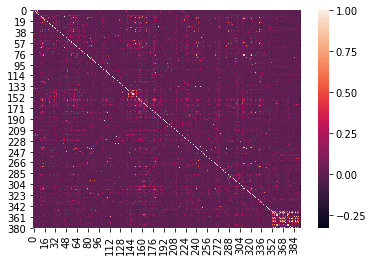

In [13]:
cm = np.corrcoef(df_zeros.values.T)
sns.heatmap(cm)
#plt.savefig('feature_correlation.png')
None

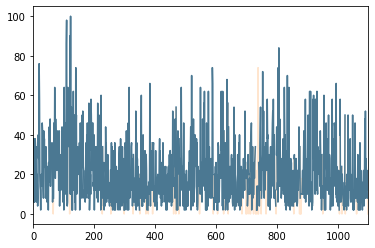

In [14]:
df['area_highway.residential'].plot()
df_zeros['area_highway.residential'].plot(alpha=.2)

In [15]:
df = df.reindex(sorted(df.columns), axis=1)

# Making X and y

In [16]:
X = df.copy().drop(['normal_aadt', 'ytrans'], axis=1)

In [17]:
y = df['ytrans'].values
y_exp = df['normal_aadt'].values

# Train & test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
X_train.shape

(769, 393)

In [21]:
type(X_test)

pandas.core.frame.DataFrame

In [22]:
X_train.shape

(769, 393)

```python
X_train.iloc[:1,:].to_csv("dummy_features.csv", index=False)
```

In [23]:
debug = pd.read_csv('debugging.csv', index_col=0)

In [24]:
debug.shape

(5, 394)

In [25]:
debug.head()

,area_aeroway.aerodrome,area_aeroway.apron,area_aeroway.helipad,area_aeroway.holding_position,area_aeroway.navigationaid,area_aeroway.runway,area_aeroway.taxiway,area_aeroway.terminal,area_amenity.arts_centre,area_amenity.atm,...,road_surface.concrete:plates,road_surface.dirt,road_surface.earth,road_surface.grass,road_surface.gravel,road_surface.ground,road_surface.paved,road_surface.sand,road_surface.unpaved,road_surface.wood
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
X_train.shape

(769, 393)

In [27]:
y_train.shape

(769,)

In [28]:
y_test.shape

(330,)

# Standardize the features

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

/home/jeremy/.anaconda3/envs/inaturalist/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/jeremy/.anaconda3/envs/inaturalist/lib/python3.7/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


# XGBoost
This works better with NaN values instead of filling with zeros. Weird.

In [38]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Predictions

### Not Standardized

In [32]:
model = XGBRegressor(n_estimators=300, learning_rate=.05, max_depth=2, base_score=0, reg_lambda=.5)
model.fit(X_train_exp, y_train_exp)

[00:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [50]:
model = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=.05, eta=.15, max_depth=3, alpha=0, random_state=0, tree_method='hist')
model.fit(X_train, y_train)

XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='hist',
             verbosity=1)

Rong's XGB Classifier:
```python
XGBClassifier(n_estimators=200,max_depth = 5, eta = 0.15076, subsample = 0.62141,
                                                  n_thread = 4, random_state=1, alpha = 0,tree_method = 'hist')
```

## Parameter Optimization

In [51]:
param_test2 = {'max_depth':range(5,25,10)}

gsearch2 = GridSearchCV(estimator = model,
                        cv=5, param_grid = param_test2, scoring=None, iid=False)

gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_


({'max_depth': 5}, 0.2749963030709876)

In [52]:
param_test2 = {'max_depth':range(1,6)}

gsearch2 = GridSearchCV(estimator = model,
                        cv=5, param_grid = param_test2, scoring=None, iid=False)

gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_


({'max_depth': 5}, 0.2749963030709876)

In [54]:
param_test4 = {'n_estimators':range(10, 110, 10)}

gsearch4 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=.05, eta=.15, max_depth=5, alpha=0, random_state=0, tree_method='hist'),
                        cv=5, param_grid = param_test4, scoring=None, iid=False)

gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'n_estimators': 100}, 0.2749963030709876)

In [65]:
np.logspace(-3, 3, 5)

array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03])

In [63]:
param_test5 = {'eta':np.linspace(0.0001, 1, 10)}

gsearch5 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=.0325, eta=.15, max_depth=5, alpha=0, random_state=0, tree_method='hist'),
                        cv=5, param_grid = param_test5, scoring=None, iid=False)

gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'eta': 0.0001}, 0.26865929505719854)

In [64]:
param_test6 = {'subsample':np.linspace(0.1, 1, 10)}

gsearch6 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=.0325, eta=.0001, max_depth=5, alpha=0, random_state=0, tree_method='hist'),
                        cv=5, param_grid = param_test6, scoring=None, iid=False)

gsearch6.fit(X_train,y_train)
gsearch6.best_params_, gsearch6.best_score_

({'subsample': 0.8}, 0.2857438584220035)

In [69]:
np.logspace(-6, 0, 5)

array([1.00000000e-06, 3.16227766e-05, 1.00000000e-03, 3.16227766e-02,
       1.00000000e+00])

In [70]:
#alpha rate
param_test1 = {'alpha':np.logspace(-6, 0, 5)}

gsearch1 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=.0325, eta=.0001, 
                                                 max_depth=5, alpha=0, random_state=0, tree_method='hist', subsample=0.8),
                        cv=5, param_grid = param_test1, scoring=None, iid=False)

gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_
##alpha of 0 is best

({'alpha': 1e-06}, 0.2857438584220035)

In [71]:
#gamma rate
param_test7 = {'gamma':[0.0, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0]}

gsearch7 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=.0325, eta=.0001, 
                                                 max_depth=5, alpha=0, random_state=0, tree_method='hist', subsample=0.8),
                        cv=5, param_grid = param_test7, scoring=None, iid=False)

gsearch7.fit(X_train,y_train)
gsearch7.best_params_, gsearch7.best_score_

({'gamma': 0.0}, 0.2857438584220035)

In [73]:
gsearch7.score(X_test, y_test)

0.23938781201365789

In [74]:
gsearch7.score(X_train, y_train)

0.6751208005898838

```python 
param_test8 = {'gamma':np.arange(0, 5, 0.5),
               'max_depth':range(1,8),
               'n_estimators':range(20, 200, 20),
               'eta':np.linspace(0.0001, 1, 10),
               'subsample':np.linspace(0.1, 1, 10),
               'learning_rate':np.linspace(0.01, .1, 10)
              }
eval_set = [X_test, y_test]
gsearch8 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=.0325, eta=.0001, 
                                                 max_depth=5, alpha=0, random_state=0, tree_method='hist', subsample=0.8,
                                                 eval_set=eval_set, early_stopping_rounds=10, n_thread = 6),
                        cv=5, param_grid = param_test8, scoring=None, iid=False)


gsearch8.fit(X_train,y_train)
gsearch8.best_params_, gsearch8.best_score_
#parameters for roc_auc without weather
# ({'eta': 0.05,
#   'gamma': 0.0,
#   'max_depth': 1,
#   'n_estimators': 25,
#   'subsample': 0.5},
#  0.582821084090225)
```

In [83]:
model = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=.0325, eta=.0001, 
                                                 max_depth=5, alpha=0, random_state=0, tree_method='hist', subsample=0.8)
model.fit(X_train, y_train)

XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.0001, gamma=0,
             importance_type='gain', learning_rate=0.0325, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, tree_method='hist',
             verbosity=1)

In [85]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [86]:
model.feature_importances_.shape

(393,)

In [88]:
xg_feat_imp = pd.DataFrame(model.feature_importances_)

In [95]:
xg_feat_imp.head()

,0
0,0.000539
1,0.000000
2,0.003866
3,0.000000
4,0.000000


In [89]:
sorted_importance = xg_feat_imp.sort_values(0, ascending=False)
sorted_importance['name'] = [df.columns[index] for index in sorted_importance.index]

In [91]:
feature_counts = [df.loc[:, df.columns[index]].value_counts().sum() for index in sorted_importance.index]

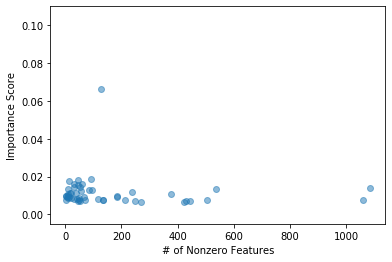

In [97]:
plt.scatter(feature_counts[:50], sorted_importance[0].values[:50], alpha=.5)
plt.ylim(-5e-3, 0.11)
plt.xlabel('# of Nonzero Features')
plt.ylabel('Importance Score')
#plt.savefig('feature_EDA_importance_vs_number_191001.png')
None

In [98]:
sorted_importance.head(10)

,0,name
184,0.066386,area_highway.traffic_signals
365,0.018636,road_highway.primary_link
368,0.018381,road_highway.secondary_link
382,0.017484,road_surface.compacted
359,0.016060,road_highway.motorway
209,0.015970,area_landuse.recreation_ground
300,0.015771,area_service.emergency_access
232,0.014420,area_leisure.slipway
212,0.014283,area_landuse.retail
309,0.013936,area_surface.asphalt


In [99]:
for name in sorted_importance['name'].iloc[:20]:
    print(' '.join(re.split("\.|_", name)).lower())

area highway traffic signals
road highway primary link
road highway secondary link
road surface compacted
road highway motorway
area landuse recreation ground
area service emergency access
area leisure slipway
area landuse retail
area surface asphalt
area highway primary
road highway trailhead
road highway service
road highway residential
road surface concrete:plates
area highway motorway
area building shed
area highway rest area
area landuse forest
road highway track


In [100]:
df.head()

,area_aeroway.aerodrome,area_aeroway.apron,area_aeroway.helipad,area_aeroway.holding_position,area_aeroway.navigationaid,area_aeroway.runway,area_aeroway.taxiway,area_aeroway.terminal,area_amenity.arts_centre,area_amenity.atm,...,road_surface.dirt,road_surface.earth,road_surface.grass,road_surface.gravel,road_surface.ground,road_surface.paved,road_surface.sand,road_surface.unpaved,road_surface.wood,ytrans
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.384754
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.399808
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626545
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493914
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421662


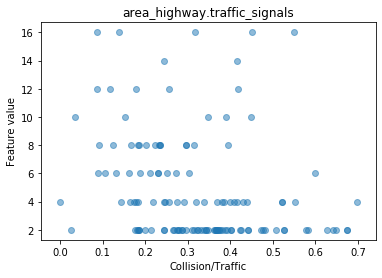

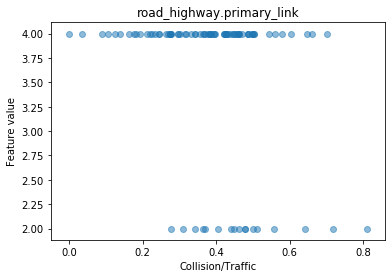

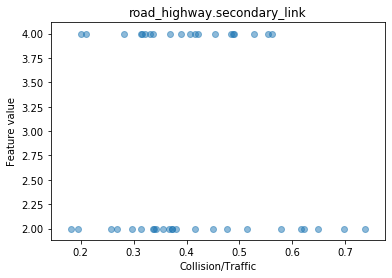

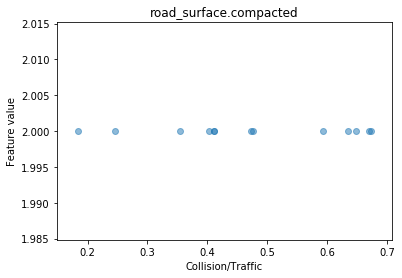

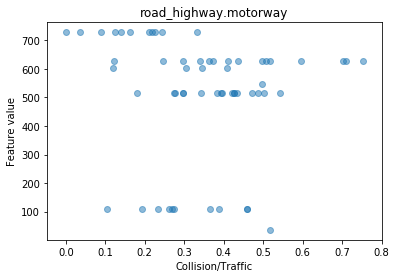

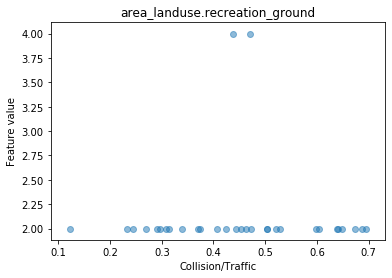

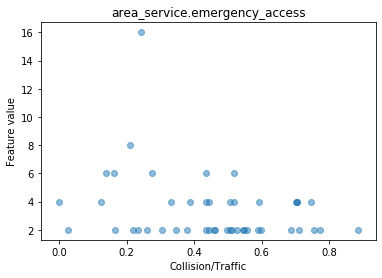

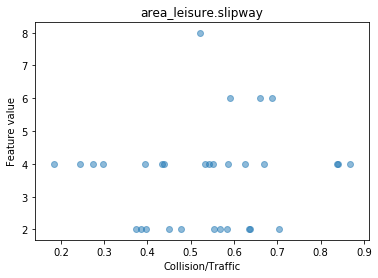

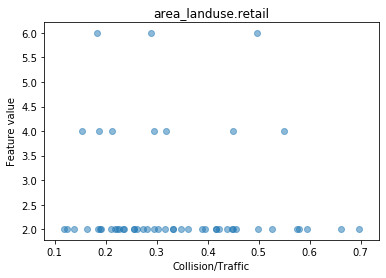

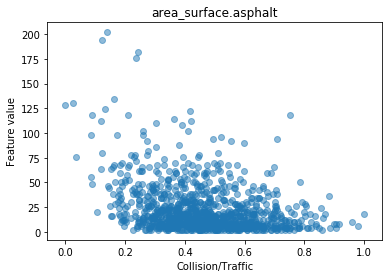

In [101]:
for col in sorted_importance.head(10).name:
    
    plt.figure()
    plt.scatter(df.ytrans, df[col].values, alpha=.5)
    plt.title(col)
    plt.xlabel('Collision/Traffic')
    plt.ylabel('Feature value')
    #plt.savefig('feature_EDA_{}_191001.png'.format(col))

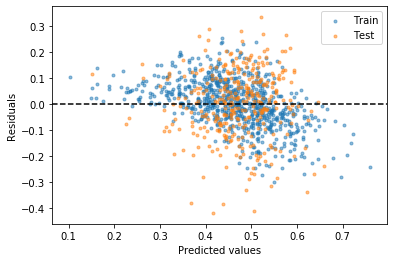

In [102]:
plt.scatter(y_train_pred, y_train_pred - y_train_exp, label='Train', alpha=.5, marker='.')
plt.scatter(y_pred, y_pred - y_test_exp, label='Test', alpha=.5, marker='.')
plt.axhline(0, color='k', ls='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend()
None

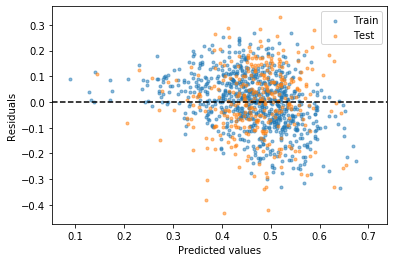

In [127]:
plt.scatter(y_train_pred, y_train_pred - y_train_exp, label='Train', alpha=.5, marker='.')
plt.scatter(y_pred, y_pred - y_test_exp, label='Test', alpha=.5, marker='.')
plt.axhline(0, color='k', ls='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend()
None

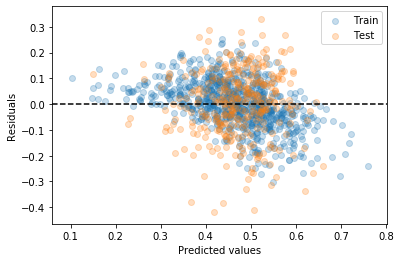

In [103]:
plt.scatter(y_train_pred, y_train_pred - y_train_exp, label='Train', alpha=.25, marker='o')
plt.scatter(y_pred, y_pred - y_test_exp, label='Test', alpha=.25, marker='o')
plt.axhline(0, color='k', ls='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend()
#plt.savefig('xgboost_predicted_vs_residuals_191001.png')
None

In [104]:
x_resid_train, y_resid_train = y_train, y_train_pred - y_train
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_resid_train.reshape(-1,1), y_resid_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

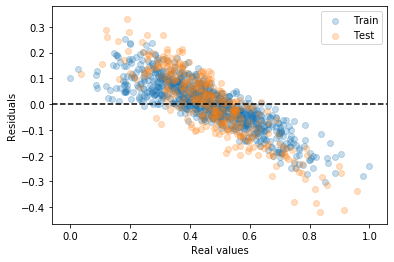

In [105]:
plt.scatter(y_train, y_train_pred - y_train, label='Train', alpha=.25, marker='o')
plt.scatter(y_test, y_pred - y_test, label='Test', alpha=.25, marker='o')
plt.axhline(0, color='k', ls='--')
plt.xlabel("Real values")
plt.ylabel("Residuals")
plt.legend()
#plt.savefig('xgboost_real_vs_residuals_191001.png')
None

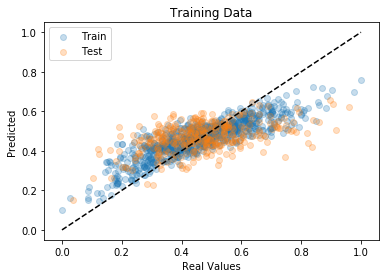

In [106]:
plt.scatter(y_train, y_train_pred, marker='o', alpha=.25, label='Train')
plt.scatter(y_test, y_pred, marker='o', alpha=.25, label='Test')
_ = np.linspace(0, 1, 10)
plt.plot(_, _, 'k--')
plt.xlabel("Real Values")
plt.ylabel("Predicted")
plt.title('Training Data')
plt.legend()
#plt.savefig('xgboost_real_vs_prediction_191001.png')
None

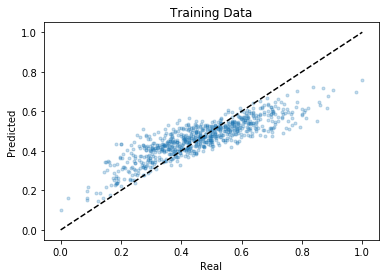

In [111]:
plt.scatter(y_train, y_train_pred, marker='.', alpha=.25)
#plt.scatter(y_test, y_pred, marker='.', alpha=.5)
_ = np.linspace(0, 1, 10)
plt.plot(_, _, 'k--')
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title('Training Data')
None

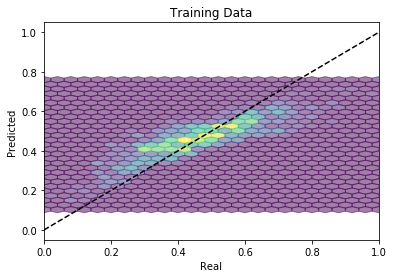

In [108]:
plt.hexbin(y_train, y_train_pred, alpha=.5, gridsize=25)
#plt.hexbin(y_test, y_pred, alpha=.5)
#_ = np.linspace(0, 1, 10)
plt.plot(_, _, 'k--')
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title('Training Data')
None

In [112]:
r2_score(y_train, y_train_pred)

0.6751208005898838

In [113]:
r2_score(y_test, y_pred)

0.23938781201365789

In [114]:
model.score(X_test, y_test)

0.23938781201365789

### Pickle that shit

In [133]:
import pickle
pickle.dump(model, open("deer_pred.pickle.dat", "wb"))

In [134]:
loaded_model = pickle.load(open("deer_pred.pickle.dat", "rb"))

[03:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [135]:
loaded_model.score(X_test, y_test)

0.22784934918856561

### Standardized

In [332]:
model_std = XGBRegressor()
model_std.fit(X_train_std, y_train)

/home/jeremy/.anaconda3/envs/inaturalist/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [333]:
y_pred_std = model_std.predict(X_test_std)

In [334]:
y_train_pred_std = model_std.predict(X_train_std)

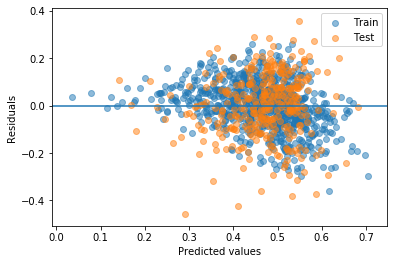

In [335]:
plt.scatter(y_train_pred_std, y_train_pred_std - y_train, label='Train', alpha=.5)
plt.scatter(y_pred_std, y_pred_std - y_test, label='Test', alpha=.5)
plt.axhline(0)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend()
None

In [336]:
r2_score(y_train, y_train_pred)

0.5191750140544416

In [337]:
r2_score(y_test, y_pred)

0.22683131541566848

# Linear regression

In [313]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [338]:
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [339]:
slr_test_pred = slr.predict(X_test)
slr_train_pred = slr.predict(X_train)

In [340]:
r2_score(slr_test_pred, y_test)

-0.0062943773341594955

In [341]:
r2_score(slr_train_pred, y_train)

0.2796424006257823

# RANSAC

In [342]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=5.0,
                         random_state=0)

In [343]:
ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [344]:
ransac_test_pred = ransac.predict(X_test)
ransac_train_pred = ransac.predict(X_train)

In [345]:
r2_score(ransac_test_pred, y_test)

-0.0062943773341594955

In [346]:
r2_score(ransac_train_pred, y_train)

0.2796424006257823

# Random Forest Regression
Can't take NaN values.

In [153]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=100)

In [154]:
rfreg.fit(np.nan_to_num(X_train), y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [155]:
rfreg_train_pred = rfreg.predict(np.nan_to_num(X_train))
rfreg_test_pred = rfreg.predict(np.nan_to_num(X_test))

In [156]:
r2_score(y_train, rfreg_train_pred)

0.903093627772623

In [157]:
r2_score(y_test, rfreg_test_pred)

0.21158044955863442

In [416]:
r2_score(y_train, rfreg_train_pred)

0.8993575333100208

In [417]:
r2_score(y_test, rfreg_test_pred)

0.2064215132174284

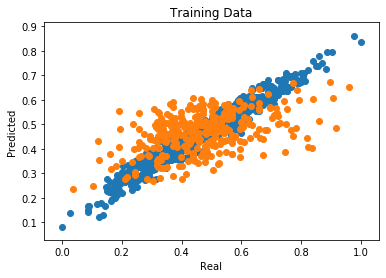

In [159]:

plt.scatter(y_train, rfreg_train_pred)
plt.scatter(y_test, rfreg_test_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title('Training Data')
plt.savefig('train_test_pred.png')
None

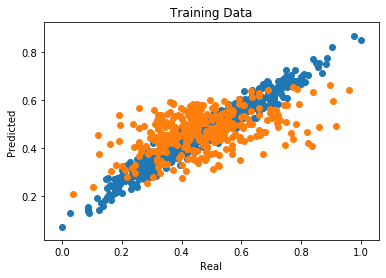

In [418]:

plt.scatter(y_train, rfreg_train_pred)
plt.scatter(y_test, rfreg_test_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title('Training Data')
None

In [244]:
from scipy import stats

stats.mode(rfreg_test_pred)

ModeResult(mode=array([0.45797289]), count=array([249]))

In [248]:
y_test.shape

(330,)

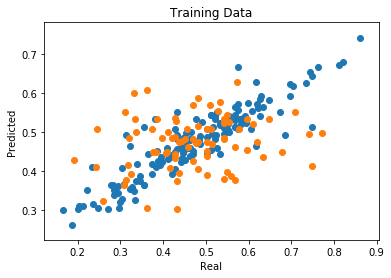

In [250]:
mask_train = (rfreg_train_pred<0.45797288) | (rfreg_train_pred>0.45797289)
plt.scatter(y_train[mask], rfreg_train_pred[mask])
mask_test = (rfreg_test_pred<0.45797288) | (rfreg_test_pred>0.45797289)
plt.scatter(y_test[mask_test], rfreg_test_pred[mask_test])
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title('Training Data')
None

In [246]:
r2_score(y_train[mask], rfreg_train_pred[mask])

0.761802248327168

In [247]:
r2_score(y_test[mask_test], rfreg_test_pred[mask_test])

-0.10588923072008893

# What's with the two sets of predictions?

In [269]:
df.iloc[:769,:].head()

,area_natural.sand,area_building.barn,area_leisure.garden,area_railway.rail,area_tourism.motel,area_amenity.courthouse,area_natural.peak,area_amenity.hospital,area_highway.footway,road_highway.stop,...,area_landuse.farmyard,area_leisure.slipway,area_natural.wetland,area_tourism.viewpoint,area_amenity.post_office,road_highway.crossing,area_highway.primary,area_service.drive-through,normal_aadt,ytrans
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017230,0.384754
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019030,0.399808
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085000,0.626545
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035417,0.493914
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021983,0.421662


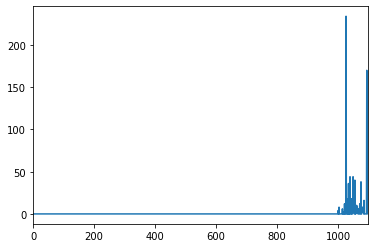

In [270]:
df['area_building.yes'].plot()

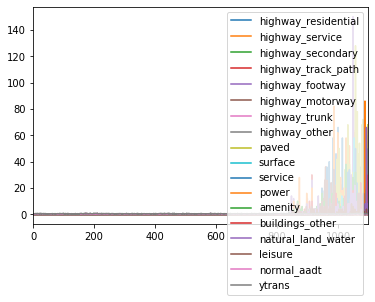

In [266]:
df.plot()

In [258]:
df.sum(0)

highway_residential    1902.000000
highway_service        1442.000000
highway_secondary       172.000000
highway_track_path      344.000000
highway_footway         588.000000
highway_motorway        436.000000
highway_trunk           514.000000
highway_other           354.000000
paved                  1972.000000
surface                 448.000000
service                 562.000000
power                   282.000000
amenity                 694.000000
buildings_other         208.000000
natural_land_water      670.000000
leisure                 384.000000
normal_aadt              57.113084
ytrans                  509.484311
dtype: float64

# Decision Tree Regressor

In [178]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(np.nan_to_num(X_train_std, 0), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [182]:
dtree.score(np.nan_to_num(X_train_std, 0), y_train)

0.19820749922198266

In [181]:
dtree.score(np.nan_to_num(X_test_std, 0), y_test)

0.08953554248240203

# SVM SVR

In [183]:
from sklearn.svm import SVR
svr = SVR()

In [185]:
svr.fit(X_train_std, y_train)

/home/jeremy/.anaconda3/envs/inaturalist/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [189]:
svr_test_pred = svr.predict(X_test_std)

In [190]:
svr_train_pred = svr.predict(X_train_std)

In [192]:
r2_score(y_train, svr_train_pred)

0.3040943914777834

In [186]:
svr.score(X_train_std, y_train)

0.3040943914777834

In [187]:
svr.score(X_test_std, y_test)

0.1450953502627037

In [188]:
r2_score?

Signature: r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
Docstring:
R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Read more in the :ref:`User Guide <r2_score>`.

Parameters
----------
y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape = (n_samples), optional
    Sample weights.

multioutput : string in ['raw_values', 'uniform_average', 'variance_weighted'] or None or array-like of shape (n_outputs)

    Defines aggregating of multiple output scores.
    Array-like value defines weights used to average scores.
    Default is "uni